#[Your_name]

Prepare libraries and data

In [2]:
# here put every import you need e.g. import nltk
import pandas as pd
import tensorflow as tf
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper
from stop_words import get_stop_words

Download data

In [3]:
# !wget 'https://drive.google.com/uc?export=download&id=1121dzWdV2ZIrQSSSLs0N4P5b3qRwg428' -O 'final_data.zip'

In [2]:
# !unzip final_data.zip

# Step [1]: Load the data

reading the data from csv file and load it to "train_data" variable \n then calling ###.head ### function to show the head of the first  5 elements in the dataframe

In [53]:
# your code here
train_data = pd.read_csv('train.csv')
train_data.head()


,text,label
0,قناة الجزيرة تنقل الاحداث في اوكرانيا وكأنها ت...,positive
1,@AJABreaking النصر لاوكرانيا البطله الصامده 🔥🔥💪🇺🇦,negative
2,@ZAINABKADYROV اللله يكون مع روسيا من ثعالب الأرض,positive
3,جرائم حرب تجري الآن في #أوكرانيا يتحمل مسؤوليت...,negative
4,إطاله أمد الحرب قليلاً (أسابيع)\nثم صواريخ أوك...,negative


In [41]:
print("Number of rows(samples) =",train_data.shape[0])

Number of rows(samples) = 33924


### Deleting duplicated rows in the DataFrame

the function below picks the duplicated values and we defined that they must be different in the label class to detirmine wether it's duplicated or not ( difference (['label']))

In [48]:
duplicateRows = train_data[train_data.duplicated(subset = train_data.columns.difference(['label']))]
if duplicateRows.shape[0] > 0 : 
    print("there is Duplicated rows almost ->",duplicateRows.shape[0]) 

there is Duplicated rows almost -> 9156


this is a simple random example of the duplicated rows

In [43]:
text = train_data.iloc[257]['text']

In [44]:
train_data[train_data['text']==text]

,text,label
210,@u2nd1 اتوقع يصير فيه مناوشات مع اوكرانيا وبلا...,neutral
257,@u2nd1 اتوقع يصير فيه مناوشات مع اوكرانيا وبلا...,neutral
16575,@u2nd1 اتوقع يصير فيه مناوشات مع اوكرانيا وبلا...,neutral


In [54]:
print("Shape of dataset before removing duplicate rows =", train_data.shape)
train_data.drop_duplicates(inplace = True, ignore_index = True)
print("Shape of dataset after removing duplicate rows =", train_data.shape)

Shape of dataset before removing duplicate rows = (33924, 2)
Shape of dataset after removing duplicate rows = (26307, 2)


 i kept the only one sample from all duplicated

In [46]:
train_data[train_data['text']==text]

,text,label


In [26]:
def check_nan(df):
    Nan_columns = df.columns[df.isnull().any()]
    if len(Nan_columns) > 0:
        for i in Nan_columns:
                print(i, df[i].isnull().sum())
    else : 
        print(" No null values found 😍")
            

In [27]:
check_nan(train_data)

text 3
label 51


In [9]:
cleaned_nan_duplic = train_data.dropna()

In [10]:
check_nan(cleaned_nan_duplic)

 No null values found 😍


In [11]:
print("Shape before removing NAN rows =", train_data.shape[0])

print("Shape after removing NAN rows =", cleaned_nan_duplic.shape[0])

Shape before removing NAN rows = 26307
Shape after removing NAN rows = 26254


In [29]:
# i save it for saving time and not running all the cells before when comming back in the next time
cleaned_nan_duplic.to_csv('cleaned.csv' , index= False)

بعد كل خطوة ستكتب إجابة السؤال في حال وجوده أو ملاحظاتك أيضاً في حال وجودها.

In [2]:
cleaned_nan_duplic = pd.read_csv('cleaned_nan_duplic.csv')

# Step [2]: Text Analysis

## [2.1] 
df.unique: extract unique valuse from the column

In [9]:
cleaned_nan_duplic['label'].unique()

array(['positive', 'negative', 'neutral', 'irrelevent', 'Irrelevant',
       'Neutral', 'Negative', 'NEGATIVE', 'netural', 'Positive',
       'positve', 'postive', 'NEUTRAL', 'positive ', 'Irrelevent',
       'irrelevant', 'POSITIVE', 'positiive', 'IRRELEVENT', 'irrevant',
       'neurtal', ' neutral', 'natural', 'negtive'], dtype=object)

we can use Regex but why complicate things!, a simple method(but not super dynamic would work!) <br> postive-label: all different words *start* with 'pos' <br> negative-label: all different words *starts* with 'neg' <br> irrelevante-label: all different words *starts* with 'irr'<br> neutral-label: all different words *ends* with 'al'

after studying the "Unique" values i ended up with these simlpe *RULES* <br>
since **neutral** have many starting up charactars, i decided to check the ends instead :)

In [34]:
def word_standrlization(word):
    lower_word = word.casefold()
    if lower_word.startswith('p'):
        return 'positive'
    if lower_word.startswith('irr'):
        return 'irrelevante'
    if lower_word.endswith('al'):
        return 'neutral'
    if lower_word.startswith('neg'):
        return 'negative'

In [33]:
cleaned_nan_duplic['label'] = cleaned_nan_duplic['label'].apply(lambda x: word_standrlization(x))
cleaned_nan_duplic['label'].unique()

array(['positive', 'negative', 'neutral', 'irrelevante'], dtype=object)

## [2.2] 

extract labels then count the number of samples over the label, finally drawing the delicious Pie 😋

In [63]:
labels = cleaned_nan_duplic['label'].unique()
counts =[]
for i in labels:
    counts.append(len(cleaned_nan_duplic.loc[cleaned_nan_duplic['label']==i].sum(axis=1)))
print(counts)

[5713, 5472, 11559, 3510]


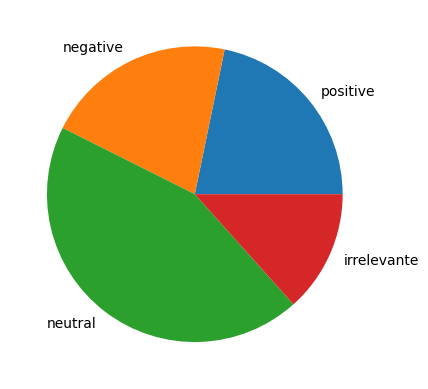

In [69]:
plt.pie(counts, labels = labels)
plt.show() 

## [2.3] 

In [128]:
test_senctence = cleaned_nan_duplic['text'][54]
print(test_senctence)
# 785

@q8zero_75 بصراحة خيي روسيا و اوكرانيا بينهم مشاكل واحنا لازم ندخل ونفاكك بينهم 🤣🤣🤣


we can use RegexToknizer, but as what we will see it's not as effecient as TweetToknizer.<br> Regex can't split emojis while emojis might be important for Sentement analysis 

In [129]:
space_tokenizer = RegexpTokenizer("\s+", gaps=True)
space_tokens = []
# for sent in compare_list:
print(space_tokenizer.tokenize(test_senctence))
space_tokens.append(space_tokenizer.tokenize(test_senctence))

['@q8zero_75', 'بصراحة', 'خيي', 'روسيا', 'و', 'اوكرانيا', 'بينهم', 'مشاكل', 'واحنا', 'لازم', 'ندخل', 'ونفاكك', 'بينهم', '🤣🤣🤣']


In [146]:
tweet_tokenizer = nltk.TweetTokenizer()
tweet_tokens = []
# for sent in compare_list:
print(tweet_tokenizer.tokenize(test_senctence))
print(tweet_tokens.append(tweet_tokenizer.tokenize(test_senctence)))

['@q8zero_75', 'بصراحة', 'خيي', 'روسيا', 'و', 'اوكرانيا', 'بينهم', 'مشاكل', 'واحنا', 'لازم', 'ندخل', 'ونفاكك', 'بينهم', '🤣', '🤣', '🤣']
None


In [147]:
def toknize_tweet(tweet):
    tweet_tokenizer = nltk.TweetTokenizer()
    tweet_tokens = tweet_tokenizer.tokenize(tweet)
    tweet_clean = []
    for token in tweet_tokens:
        tweet_clean.append(token)
    return tweet_clean


In [148]:
print(toknize_tweet(cleaned_nan_duplic['text'][250]))

['أميل', 'للاعتقاد', 'ان', 'الحرب', 'بين', 'روسيا', 'و', 'أوكرانيا', 'قامت', 'من', 'أجل', 'هدف', 'واحد', 'وهو', 'تمرير', 'الاتفاق', 'النووي', 'بين', 'إيران', 'و', 'العالم', 'رغم', 'مافي', 'هذا', 'الاعتقاد', 'من', 'تبسيط', 'للأمور', '!']


In [152]:
cleaned_nan_duplic['tokenized_sents'] = cleaned_nan_duplic.apply(lambda row: toknize_tweet(row['text']), axis=1)

In [154]:

cleaned_nan_duplic['tokenized_sents'].head()

0    [قناة, الجزيرة, تنقل, الاحداث, في, اوكرانيا, و...
1    [@AJABreaking, النصر, لاوكرانيا, البطله, الصام...
2    [@ZAINABKADYROV, اللله, يكون, مع, روسيا, من, ث...
3    [جرائم, حرب, تجري, الآن, في, #أوكرانيا, يتحمل,...
4    [إطاله, أمد, الحرب, قليلاً, (, أسابيع, ), ثم, ...
Name: tokenized_sents, dtype: object

number of the whole words in the dataFrame 

In [159]:
cleaned_nan_duplic["Number of Words"] = cleaned_nan_duplic["tokenized_sents"].apply(lambda n: len(n))
#  the number of words for all tweets in the whole data frame 😉
cleaned_nan_duplic['Number of Words'].sum()

729867

In [162]:
cleaned_nan_duplic.to_csv('toknized.csv')

In [3]:
cleaned_nan_duplic = pd.read_csv('toknized.csv')

number of special words in the whole dataFrame 😁

In [161]:
len(set(cleaned_nan_duplic["tokenized_sents"].sum()))

93332

## [2.4] 

get all tokenized words gathered and then plotting them 

In [275]:
words_str = str(cleaned_nan_duplic['tokenized_sents'].sum())

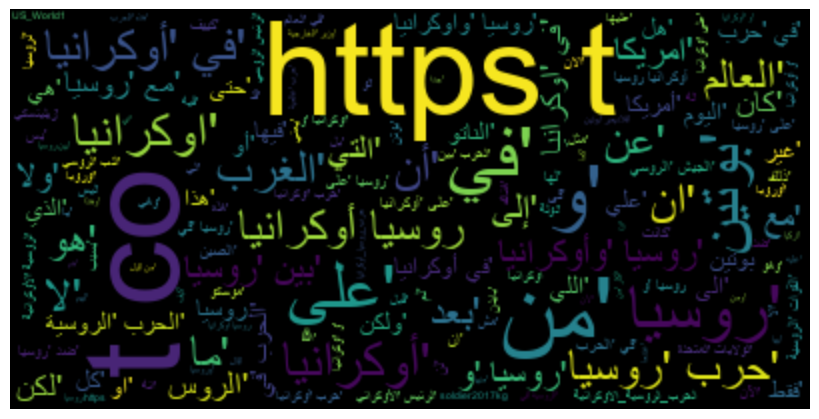

In [276]:
# arabia_stop_words = get_stop_words('arabic')
wc = WordCloud(font_path='arial')
word_cloud = wc.generate_from_text(get_display(arabic_reshaper.reshape(words_str)))
plt.figure(figsize=(8,8) , facecolor= None)
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


## [2.5] 

In [4]:
def most_frequent_words(text):
    fdist = nltk.FreqDist(text)
    return fdist.most_common(15)

In [5]:
def least_frequent_words(text):
    fdist = nltk.FreqDist(text)
    return fdist.hapaxes()[:10]


In [366]:
data_text = cleaned_nan_duplic['tokenized_sents'].sum()

### check the answer it's wrong !!!!!!!

for bgram in nltk.ngrams(text,2):
        bigram.append(bgram)
    fdist_b=nltk.FreqDist(bigram)
    mostCommonB=fdist_b.most_common(10)
        
-------------------------------------------
    
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    bcf = BigramCollocationFinder.from_words(text)
    BigramColl=bcf.nbest(bigram_measures.pmi, 10)

In [6]:
def most_occure(text,times):
    text_corpus = nltk.Text(text)
    return (text_corpus.collocations(10,times))

In [381]:
most_occure(data_text,2)

روسيا وأوكرانيا; #روسيا #أوكرانيا; الولايات المتحدة; بين روسيا; روسيا
واوكرانيا; الجيش الروسي; الدب الروسي; الحرب الروسية; حرب روسيا; الرئيس
الأوكراني


In [382]:
most_occure(data_text,3)

#روسيا #أوكرانيا; روسيا وأوكرانيا; الولايات المتحدة; حرب روسيا; الجيش
الروسي; الحرب الروسية; القوات الروسية; الدب الروسي; روسيا واوكرانيا;
الرئيس الأوكراني


In [8]:
test_data = cleaned_nan_duplic['tokenized_sents']
type(test_data)
test_data[1]

"['@AJABreaking', 'النصر', 'لاوكرانيا', 'البطله', 'الصامده', '🔥', '🔥', '💪', '🇺', '🇦']"

In [57]:
# from nltk import word_tokenize 
from nltk.util import bigrams
text = cleaned_nan_duplic['tokenized_sents'][:3].splite()
print(text)
for tweet in text:
    g = list(bigrams(tweet.split(',')))
    
    

0    ['قناة', 'الجزيرة', 'تنقل', 'الاحداث', 'في', '...
1    ['@AJABreaking', 'النصر', 'لاوكرانيا', 'البطله...
2    ['@ZAINABKADYROV', 'اللله', 'يكون', 'مع', 'روس...
Name: tokenized_sents, dtype: object


In [78]:
text_split = cleaned_nan_duplic['tokenized_sents'].apply(lambda x : x.split())


In [69]:
text_split[5]

["['@NUCWorldConf',",
 "'يامغفل',",
 "'اذا',",
 "'بوتين',",
 "'خسر',",
 "'الحرب',",
 "'فماذا',",
 "'كسبت',",
 "'انتة',",
 "'يالخيجة',",
 "'؟']"]

In [378]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

# creature_filter = lambda *w: 'روسيا' not in w

## Bigrams

finder = BigramCollocationFinder.from_documents(text_split)
finder.apply_freq_filter(3)
print(finder.nbest(bigram_measures.likelihood_ratio, 10))

# ## Trigrams
# finder = TrigramCollocationFinder.from_words()
# # only trigrams that appear 3+ times
# finder.apply_freq_filter(3)

# # only trigrams that contain 'creature'
# # finder.apply_ngram_filter(creature_filter)

# # return the 10 n-grams with the highest PMI
# print(finder.nbest(trigram_measures.likelihood_ratio, 10))

[("'🇷',", "'🇺',"), ("'!',", "'!',"), ("'روسيا',", "'وأوكرانيا',"), ("'#روسيا',", "'#أوكرانيا',"), ("'🇺',", "'🇦',"), ("'?',", "'?',"), ("'الولايات',", "'المتحدة',"), ("'في',", "'أوكرانيا',"), ("'بين',", "'روسيا',"), ("'روسيا',", "'واوكرانيا',")]


## [2.6]

## [2.7]

## [2.8]

# Step [3]: Text Cleaning and Normalization

## [3.1] 


In [129]:
test_men = 'https://t.co/vFF3wKfJlH@address_libya بل ارادت ان تحمي @AlHadath الانفصاليين @AlHadath هو جزء من النسيج الاجتماعي في دوله مستقله ، ثم لماذا يتم قصف  كييف ، والكثير من المدن الاخري مثل اوديسا و يحتل مدن ساحليه لا يوجد بها روس اصلا ، واخيرا لماذا يستعين بالشيشان المتطرفين ويورط بيلاروسيا واراضيها @AlHadath هذا الفرق بين العقول التى تدير أوربا والعقول الموجودة على كراسي #السلطه # فى #مجتمعنا في حرب اوكرانيا كل دول الجوار فتحت أبوابها لايواء اللاجئين الاوكران حتى روسيا نفسها فإذا اللاجئ وجد فرصة البقاء لما ترك ماله وداره وخرج'

In [130]:
def clean_mention_link(rgx_list, text):
    new_text = text
    for rgx_match in rgx_list:
        new_text = re.sub(rgx_match,'', new_text)
    return new_text  


In [131]:
rgx_list = ['@\w*' , 'http\S*']
clean_mention_link(rgx_list ,test_men)

' بل ارادت ان تحمي  الانفصاليين  هو جزء من النسيج الاجتماعي في دوله مستقله ، ثم لماذا يتم قصف  كييف ، والكثير من المدن الاخري مثل اوديسا و يحتل مدن ساحليه لا يوجد بها روس اصلا ، واخيرا لماذا يستعين بالشيشان المتطرفين ويورط بيلاروسيا واراضيها  هذا الفرق بين العقول التى تدير أوربا والعقول الموجودة على كراسي #السلطه # فى #مجتمعنا في حرب اوكرانيا كل دول الجوار فتحت أبوابها لايواء اللاجئين الاوكران حتى روسيا نفسها فإذا اللاجئ وجد فرصة البقاء لما ترك ماله وداره وخرج'

## [3.2] 

In [132]:
def clean_hashtags(text):
    return re.sub('#' , '',text)

In [134]:
clean_hashtags(test_men)

'https://t.co/vFF3wKfJlH@address_libya بل ارادت ان تحمي @AlHadath الانفصاليين @AlHadath هو جزء من النسيج الاجتماعي في دوله مستقله ، ثم لماذا يتم قصف  كييف ، والكثير من المدن الاخري مثل اوديسا و يحتل مدن ساحليه لا يوجد بها روس اصلا ، واخيرا لماذا يستعين بالشيشان المتطرفين ويورط بيلاروسيا واراضيها @AlHadath هذا الفرق بين العقول التى تدير أوربا والعقول الموجودة على كراسي السلطه  فى مجتمعنا في حرب اوكرانيا كل دول الجوار فتحت أبوابها لايواء اللاجئين الاوكران حتى روسيا نفسها فإذا اللاجئ وجد فرصة البقاء لما ترك ماله وداره وخرج'

## [3.3] 

In [268]:
def delete_repeated(text):
    pattern = '(.)\1{3,}'
    output = re.sub(pattern,r'\1', text)
    return output
delete_repeated('رووسيا')

'رووسيا'

## [3.4] 

### [3.4.1] 

In [336]:
arabic_numbers  = r'١٢٣٤٥٦٧٨٩٠'
english_numbers = r'1234567890'
arabic_regexp = '[١٢٣٤٥٦٧٨٩٠]'
# english_regexp = '[1234567890]'
# eng_ar_reg = '[١٢٣٤٥٦٧٨٩٠]|[1234567890]'
# r"(%s)" % r"|".join(arabic_numbers)
def _sub(match_object, digits):
    return english_numbers[digits.find(match_object.group(0))]
def _sub_arabic(match_object):
    return _sub(match_object, arabic_numbers)
def replace_arabic(match_obj):
    return re.sub(arabic_regexp, _sub_arabic, match_obj.group())

In [337]:

def replace_numbers(text,regx,replace_function):
    return re.sub(regx,replace_function,text)


In [338]:
arabic_regx ='[١٢٣٤٥٦٧٨٩٠]'
replace_numbers('wes ١١١ and this is ١ for you',arabic_regx,replace_arabic)

'wes 111 and this is 1 for you'

### [3.4.2] 

In [454]:
eng_ar_reg = '[١٢٣٤٥٦٧٨٩٠]|[1234567890]'
replace_numbers('wes ١١١ and this is 1 for you',eng_ar_reg,'<NUM>')

'wes ١١١ and this is 1 for you'

### [3.4.3] 

In [340]:
replace_numbers('wes ١١١ and this is 1 for you',eng_ar_reg,'')

'wes  and this is  for you'

## [3.5] 

### [3.5.1] 

In [367]:
def delete_pun(text):
    return re.sub(r'[^\w\s]|[_]','',text)
delete_pun('im doning_and#you>, dine! what anout @you?!!!!')

'im doningandyou dine what anout you'

### [3.5.2] 

In [376]:
def delete_emojies(text):
  # Ref: https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1#gistcomment-3208085
  # Ref: https://en.wikipedia.org/wiki/Unicode_block
  emoji_Unicode = re.compile(
    "(["
    "\U00002600-\U000027BF"
    "\U0001f300-\U0001f64F"
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
  text = re.sub(emoji_Unicode,' ', text)
  return text

In [377]:
delete_emojies('Poti❤️💦🔥hahahah🌷yes😂')

'Poti ️  hahahah yes '

### [3.5.3] 

In [513]:
my_punct = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '.',
           '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', 
           '`', '{', '|', '}', '~', '»', '«', '“', '”','_']
emojis =[
    '\U00002600-\U000027BF',
    '\U0001f300-\U0001f64F',
    '\U0001F1E0-\U0001F1FF',  # flags (iOS)
    '\U0001F300-\U0001F5FF',  # symbols & pictographs
    '\U0001F600-\U0001F64F',  # emoticons
    '\U0001F680-\U0001F6FF',  # transport & map symbols
    '\U0001F700-\U0001F77F',  # alchemical symbols
    '\U0001F780-\U0001F7FF',  # Geometric Shapes Extended
    '\U0001F800-\U0001F8FF',  # Supplemental Arrows-C
    '\U0001F900-\U0001F9FF',  # Supplemental Symbols and Pictographs
    '\U0001FA00-\U0001FA6F',  # Chess Symbols
    '\U0001FA70-\U0001FAFF',  # Symbols and Pictographs Extended-A
    '\U00002702-\U000027B0',  # Dingbats
    ]
def remove_non_arabi(text):
    punc_emoj = my_punct + emojis
    emojis_str=''
    for i in emojis:
        emojis_str +=i
    all_patterens_str = emojis_str +"".join(punc_emoj)+'١٢٣٤٥٦٧٨٩٠'
    all_patterens_regx = re.compile("[^"+all_patterens_str+"0-9"+ "ا-ي"+"]")
    return re.sub(all_patterens_regx, " ",text) # the "-" symbol should remain
remove_non_arabi( "انا حقولك 1و2و3 وانت时不再来。  بتقولي ❤ كدا  हिंदी वर्णमाला عشانहिन्दी  مش عارف@احمد_صاحبي russia ")


'انا حقولك 1و2و3 وانت       بتقولي ❤ كدا                 عشان        مش عارف@احمد_صاحبي        '

## [3.6] 

## [3.7] 

## [3.8] 

### [3.8.1] 

In [481]:
def hamza_standardization(text):
   return re.sub(r"[ؤئء]", "ء", text)
hamza_standardization('ئ والله ')
     

'ء والله '

### [3.8.2] 

In [494]:
def aliphs_standardization(text):
    return re.sub(r"[إأٱآا]", "ا", text)
aliphs_standardization('والله جد! آلن لديّ الكثيرُ من الآعمال')

'والله جد! الن لديّ الكثيرُ من الاعمال'

### [3.8.3] 

In [486]:
def tatwil_remover(text):
    return re.sub(r'ـ' , "",text)
tatwil_remover(' وليــدـ تعــــــال')


'وليد تعال'

### [3.8.4] 

In [496]:
def tanwin_removal(text):
    return re.sub(r'[ َ ً ِ ٍ ُ ٌ ّ ْ]',' ',text)
tanwin_removal('لديّ الكثيرُ من الآعمال')


'لدي  الكثير  من الآعمال'

## [3.9] 

In [503]:
def white_space_normlization(text):
    return re.sub(r'\s+'," ",text)
white_space_normlization('شي حلوو والله    كزا فراغ           بفرااااغ ')

'شي حلوو والله كزا فراغ بفرااااغ '

## [3.10]

## Extra

# Step [4]: Prepare Training Data

## [4.1] 


تابع المعالجة النهائي سوف يكون كالآتي

In [ ]:
def preprocess(tweet, remove_url = True, remove_mentions = True, ... ):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
        flags: list of "work" values for all functions will called here.
    Output:
        cleaned_tweet: tweet after apply all cleaning and normlizaing functions

    """
    if remove_url:
        tweet = remove_urls(tweet)
    if remove_mentions:
        tweet = remove_mentions(tweet)
    ...
    return tweet

## [4.2] 

## [4.3] 

## [4.4] 